<a href="https://colab.research.google.com/github/nedokormysh/Stepik_AI_edu_intro_DL_NLP/blob/week_7_scraping/web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Скрапинг и парсинг

## Содержание урока

* Азы всех азов
* Что делать, если сервер разозлился
* Хитрости
* Что такое API

## 1. Азы всех азов

### Где брать "готовые" данные?


*   [Kaggle](https://www.kaggle.com/)
*   [Google Dataset Search](https://datasetsearch.research.google.com/)
*   [UCI Machine Learning Repository](https://archive.ics.uci.edu/datasets)
*   [Datatrade](https://datarade.ai/data-categories)
*   ...



### Зачем собирать данные автоматически?

<br>

<br>

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/aaaaaa.png" width="500">

### HTTP протокол

**HTTP** расшифровывается как *HyperText Transfer Protocol* — протокол передачи гипертекста


HTTP использует при работе клиент-серверную модель. В ней участвуют клиент и сервер.

Обмен информацией осуществляется по следующему принципу:
*   Клиент формирует запрос на некоторый ресурс и отправляет его на сервер
*   Сторона сервера принимает запрос. На этом этапе происходит обработка поданной «команды»
*   Серверная сторона возвращает клиенту ресурс, который был запрошен изначально

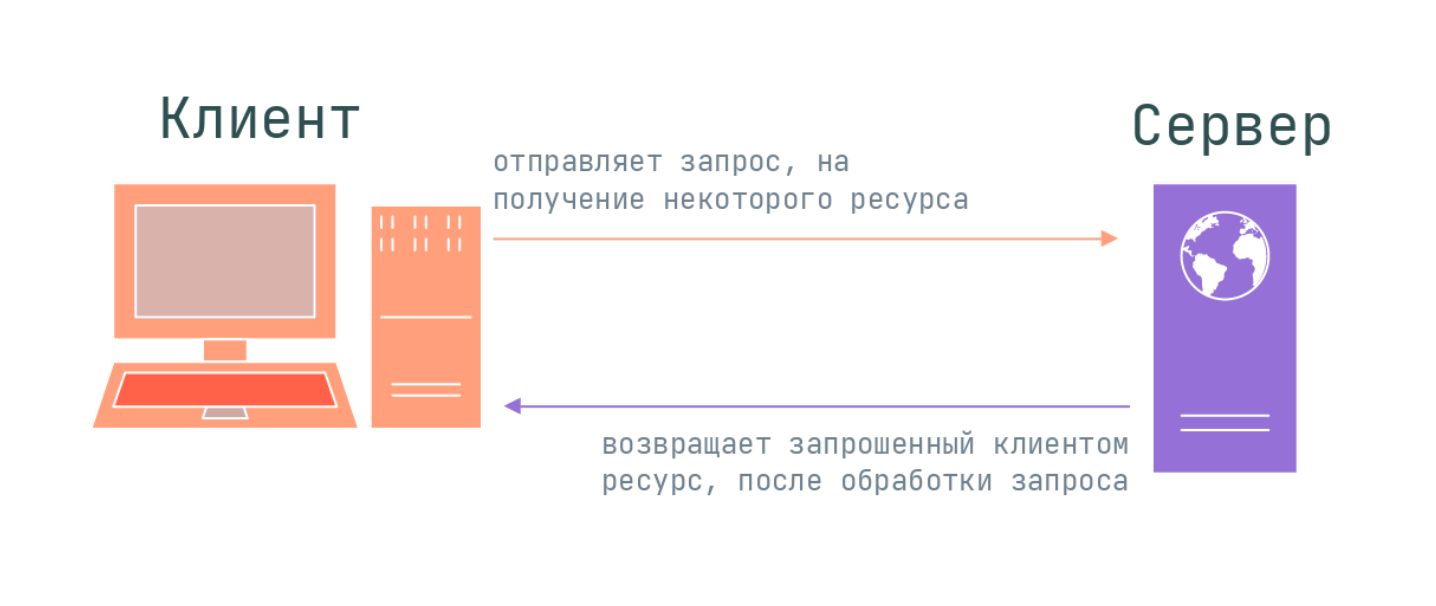

Данные между клиентом и сервером в рамках работы протокола передаются с помощью HTTP-сообщений. Они бывают двух видов:
*   **Запросы** (HTTP Requests)
*   **Ответы** (HTTP Responses)


Запросы и ответы имеют следующую структуру:
*   Стартовая строка
*   HTTP-заголовки
*   Пустая строка
*   Тело сообщения (опционально)



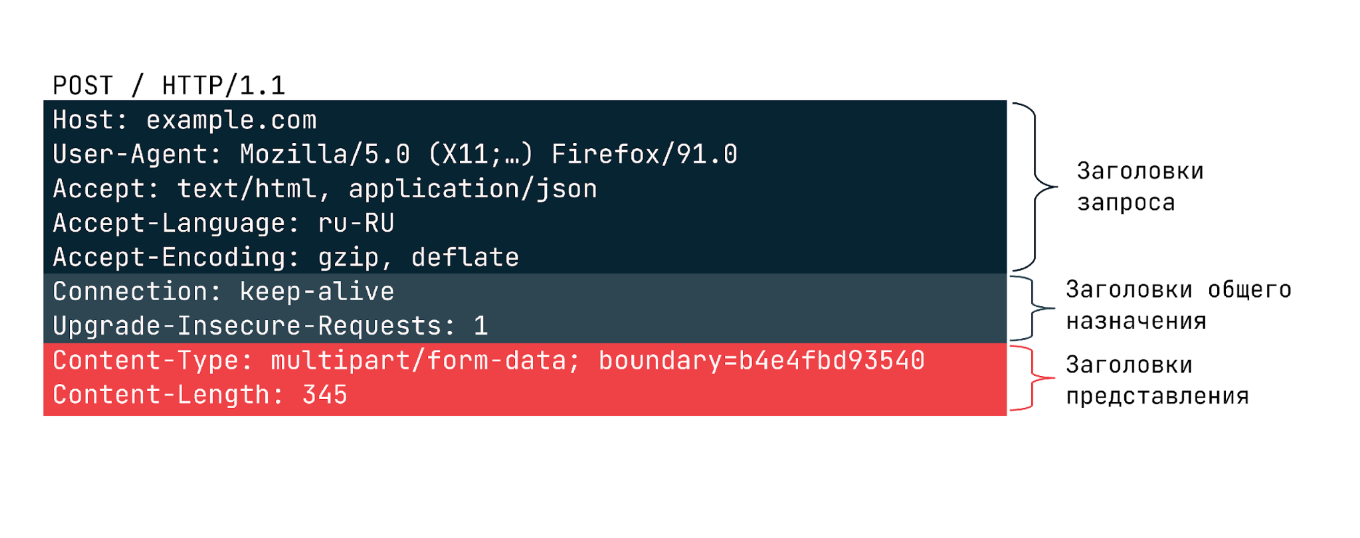

#### HTTP-запрос

**Методы HTTP-запроса**

*   GET
*   POST
*   HEAD
*   PUT
*   DELETE
*   OPTIONS
*   PATCH



#### HTTP-ответ

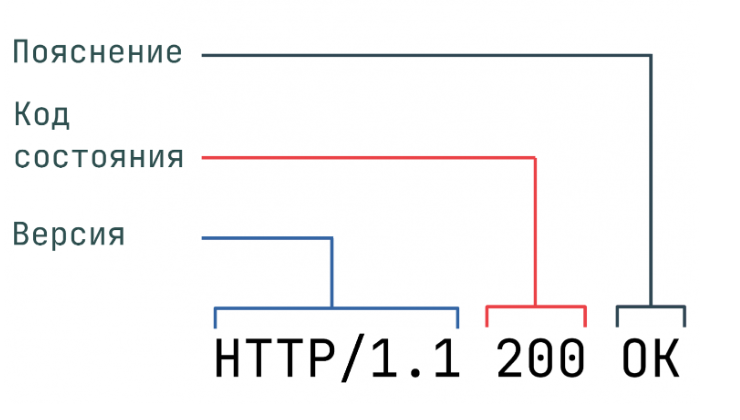

**Коды состояния**

*   1xx
*   2xx
*   3xx
*   4xx
*   5xx


**Распространенные коды ответов**

*   200 OK
*   302 Found
*   400 Bad Request
*   403 Forbidden
*   404 Not Found
*   500 Internal Error



### Что такое HTML?

**HTML (HyperText Markup Language)**  — это такой же язык разметки как Markdown или LaTeX. Он является стандартным для написания различных сайтов. Команды в таком языке называются **тегами**. Если открыть абсолютно любой сайт, нажать на правую кнопку мышки, а после нажать `View page source`, то перед вами предстанет HTML скелет этого сайта.

Вот так можно открыть html-код стартовой яндекса, найти в нём новость из топа и немного её изменить. Понятное дело, что вы так меняете html-страничку только на своём компьютере (клиенте). На сервере яндекса остаётся исходная версия. Когда вы обновите страничку все правки исчезнут. Однако никто вам не запрещает ворваться вк в какую-нибудь переписку, открыть её код, поменять текст нескольких сообщений и наделать скринов для мемов.


HTML-страница это ни что иное, как набор вложенных тегов. Можно заметить, например, следующие теги:

- `<title>` – заголовок страницы
- `<h1>…<h6>` – заголовки разных уровней
- `<p>` – абзац (paragraph)
- `<div>` – выделения фрагмента документа с целью изменения вида содержимого
- `<table>` – прорисовка таблицы
- `<tr>` – разделитель для строк в таблице
- `<td>` – разделитель для столбцов в таблице
- `<b>` – устанавливает жирное начертание шрифта

Обычно команда `<...>` открывает тег, а  `</...>` закрывает его. Все, что находится между этими двумя командами, подчиняется правилу, которое диктует тег. Например, все, что находится между `<p>` и  `</p>` — это отдельный абзац.   

Теги образуют своеобразное дерево с корнем в теге `<html>` и разбивают страницу на разные логические кусочки. У каждого тега есть свои потомки (дети) — те теги, которые вложены в него и свои родители.

Например, HTML-древо страницы может выглядеть вот так:


````
<html>
<head> Заголовок </head>
<body>
    <div>
        Первый кусок текста со своими свойствами
    </div>
    <div>
        Второй кусок текста
            <b>
                Третий, жирный кусок
            </b>
    </div>
    Четвёртый кусок текста
</body>
</html>
````

Можно работать с этим html как с текстом, а можно как с деревом. Обход этого дерева и есть парсинг веб-страницы. Мы всего лишь будем находить нужные нам узлы среди всего этого разнообразия и забирать из них информацию!

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/tree.png" width="450">

## Качаем цены на книги

* Хотим собрать [цены на книги](http://books.toscrape.com)
* Руками долго, напишем код на Python!

Доступ к веб-станицам позволяет получать модуль `requests`. Подгрузим его.

Если у вас не установлен этот модуль, то сделайте это командой:  
`pip install requests`.

In [ ]:
# !pip install requests

In [ ]:
import requests

url = 'http://books.toscrape.com/catalogue/page-1.html'
response = requests.get(url)
response

<Response [200]>

Благословенный 200 ответ - соединение установлено и данные получены, всё чудесно! Если попытаться перейти на несуществующую страницу, то можно получить, например, знаменитую ошибку 404.

In [ ]:
requests.get('http://books.toscrape.com/big_scholarship')

<Response [404]>

Внутри response лежит html-разметка странички, которую мы парсим.

In [ ]:
response.text[:1000]

'\n\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:30" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon" 

Выглядит неудобоваримо, как насчет сварить из этого дела что-то покрасивее? Например, прекрасный суп.

<img align="center" src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/alisa.jpg" height="200" width="200">

Пакет **[`bs4`](https://www.crummy.com/software/BeautifulSoup/)**, a.k.a **BeautifulSoup** был назван в честь стишка про красивый суп из Алисы в стране чудес. Эта совершенно волшебная библиотека, которая из сырого и необработанного HTML (или XML) кода страницы выдаст вам структурированный массив данных, по которому очень удобно искать необходимые теги, классы, атрибуты, тексты и прочие элементы веб страниц.

> Пакет под названием `BeautifulSoup` — скорее всего, не то, что вам нужно. Это третья версия (*Beautiful Soup 3*), а мы будем использовать четвертую. Так что нам нужен пакет `beautifulsoup4`. Чтобы было совсем весело, при импорте нужно указывать другое название пакета — `bs4`, а импортировать функцию под названием `BeautifulSoup`. В общем, сначала легко запутаться, но эти трудности нужно преодолеть однажды, а потом будет проще.

In [ ]:
# !pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup

# распарсили страничку в дерево
tree = BeautifulSoup(response.content, 'html.parser')

In [ ]:
type(tree)

bs4.BeautifulSoup

Внутри переменной `tree` теперь лежит дерево из тегов, по которому мы можем совершенно спокойно бродить.

Можно вытащить из того места, куда мы забрели, текст с помощью метода `text`.

In [ ]:
tree.html.head.title.text

'\n    All products | Books to Scrape - Sandbox\n'

С текстом можно работать классическими питоновскими методами. Например, можно избавиться от лишних отступов.

In [ ]:
tree.html.head.title.text.strip()

'All products | Books to Scrape - Sandbox'

Более того, зная адрес элемента, мы сразу можем найти его. Например, вот так в коде страницы мы можем найти где именно для каждой книги лежит основная информация. Видно, что она находится внутри тега `article`, для которого прописан класс `product_pod` (грубо говоря, в html класс задаёт оформление соотвествующего кусочка страницы).

Вытащим инфу о книге из этого тега.

In [ ]:
# tree.find('article')
# tree.find('article', {'class': 'product_pod'})

In [ ]:
type(tree.find_all('article', {'class': 'product_pod'}))

bs4.element.ResultSet

In [ ]:
len(tree.find_all('article', {'class': 'product_pod'}))

20

In [ ]:
books = tree.find_all('article', {'class' : 'product_pod'})
books[0]

<article class="product_pod">
<div class="image_container">
<a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [ ]:
books[0].h3.a.get('title')

'A Light in the ...'

In [ ]:
# books[0].p.get('class')
books[0].p.get('class')[1]

'Three'

In [ ]:
# books[0].find('p', {'class': 'price_color'})
books[0].find('p', {'class': 'price_color'}).text

'£51.77'

In [ ]:
# books[0].div.a.get('href')
'http://books.toscrape.com/catalogue/' + books[0].div.a.get('href')

'http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html'

In [ ]:
info = []

for book in books:
    title = book.h3.a.get('title')
    ranking = book.p.get('class')[1]
    price = book.find('p', {'class': 'price_color'}).text
    url = 'http://books.toscrape.com/catalogue/' + book.div.a.get('href')

    row = {
        'title': title,
        'price': price,
        'ranking': ranking,
        'url': url
        }

    info.append(row)

In [ ]:
info[:2]

[{'title': 'A Light in the Attic',
  'price': '£51.77',
  'ranking': 'Three',
  'url': 'http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html'},
 {'title': 'Tipping the Velvet',
  'price': '£53.74',
  'ranking': 'One',
  'url': 'http://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html'}]

Полученный после поиска объект также обладает структурой bs4. Поэтому можно продолжить искать нужные нам объекты уже в нём.

In [ ]:
type(books[0])

bs4.element.Tag

In [ ]:
books[0].find('p', {'class': 'price_color'}).text

'£51.77'

Обратите внимание, что для поиска есть как минимум два метода: `find` и `find_all`. Если несколько элементов на странице обладают указанным адресом, то метод `find` вернёт только самый первый. Чтобы найти все элементы с таким адресом, нужно использовать метод `find_all`. На выход будет выдан список.

Кроме содержимого у тегов часто есть атрибуты. Например, у названия книги есть атрибуты `title` и `href`:

In [ ]:
books[0].h3

<h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>

Их тоже можно вытащить.

In [ ]:
books[0].h3.a.get('href')

'a-light-in-the-attic_1000/index.html'

In [ ]:
books[0].h3.a.get('title')

'A Light in the Attic'

А ещё по этим атрибутам можно искать интересующие нас кусочки страницы.

In [ ]:
tree.find_all('a', {'title': 'A Light in the Attic'})

[<a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>]

Собственно говоря, это всё.

Обратите внимание, что на сайте все книги лежат на разных страничках. Если попробовать покликать их, можно заметить, что в ссылке будет меняться атрибут `page`. Значит, если мы хотим собрать все книги, надо создать кучу ссылок с разным `page` внутри цикла. Когда качаешь данные с более сложных сайтов, в ссылке часто есть огромное количество атрибутов, которые регулируют выдачу.



Давайте запишем весь код для сбора книг в виде функции. На вход она будет принимать номер странички, которую надо скачать.

In [ ]:
def get_page(p):
    # изготовили ссылку
    url = f'http://books.toscrape.com/catalogue/page-{p}.html'

    # сходили по ней
    response = requests.get(url)

    # построили дерево
    tree = BeautifulSoup(response.content, 'html.parser')

    # нашли в нём всё самое интересное
    books = tree.find_all('article', {'class' : 'product_pod'})

    info = []
    for book in books:
        title = book.h3.a.get('title')
        ranking = book.p.get('class')[1]
        price = book.find('p', {'class': 'price_color'}).text
        url = 'http://books.toscrape.com/catalogue/' + book.div.a.get('href')

        row = {
            'title': title,
            'price': price,
            'ranking': ranking,
            'url': url
            }
        info.append(row)

    return info

Осталось только пройтись по всем страничкам от page-1 до page-50 циклом и данные у нас в кармане.

In [ ]:
infa = []

for p in range(1, 51):
    infa.extend(get_page(p))

In [ ]:
len(infa)

1000

In [ ]:
import numpy as np

random_seconds = [3, 5, 7, 10, 20]
np.random.choice(random_seconds)

3

In [ ]:
import time

infa = []

count = 0
for p in range(1,51):
    count += 1

    try:
        infa.extend(get_page(p))
        time.sleep(3)

    except:
        pass

    if count % 10 == 0:
        df = pd.DataFrame(infa)
        df.to_csv('books.csv', index=False)

In [ ]:
df.to_csv('ex_rates.csv', index=False)

In [ ]:
df.to_excel('ex_rates.xlsx', index=False)

In [ ]:
df = pd.read_csv('ex_rates.csv')
df.head()

,Цифр. код,Букв. код,Единиц,Валюта,Курс
0,36,AUD,1,Австралийский доллар,383392
1,944,AZN,1,Азербайджанский манат,359975
2,51,AMD,100,Армянских драмов,151847
3,933,BYN,1,Белорусский рубль,245875
4,975,BGN,1,Болгарский лев,306977


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
import pandas as pd

df = pd.DataFrame(infa)
print(df.shape)
df.head()

(1000, 4)


,title,price,ranking,url
0,A Light in the Attic,£51.77,Three,http://books.toscrape.com/catalogue/a-light-in...
1,Tipping the Velvet,£53.74,One,http://books.toscrape.com/catalogue/tipping-th...
2,Soumission,£50.10,One,http://books.toscrape.com/catalogue/soumission...
3,Sharp Objects,£47.82,Four,http://books.toscrape.com/catalogue/sharp-obje...
4,Sapiens: A Brief History of Humankind,£54.23,Five,http://books.toscrape.com/catalogue/sapiens-a-...


In [ ]:
df['price'] = df['price'].apply(lambda x: float(x[1:]))

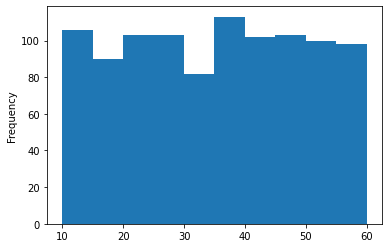

In [ ]:
df['price'].plot(kind='hist', bins=10);

In [ ]:
df['price'].min()

10.0

In [ ]:
df['price'].max()

59.99

In [ ]:
rng = df['price'].max() - df['price'].min()

In [ ]:
rng

49.99

In [ ]:
rng / 10

4.9990000000000006

In [ ]:
(df['price'].min(), df['price'].min() + (rng / 10))

(10.0, 14.999)

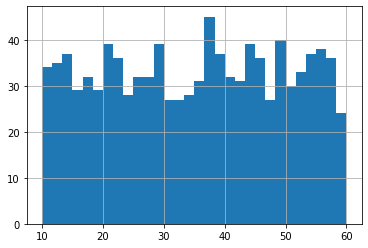

In [ ]:
df['price'].hist(bins=30);

Кстати говоря, если перейти по ссылке в саму книгу, там о ней будет куча дополнительной информации. Можно пройтись по всем ссылкам и выкачать себе по ним дополнительную информацию.

## 2. Что делать, если сервер разозлился

* Вы решили собрать себе немного данных
* Сервер не в восторге от ковровой бомбардировки автоматическими запросами
* Error 403, 404, 504, $\ldots$
* Капча, требования зарегистрироваться
* Заботливые сообщения, что с вашего устройства обнаружен подозрительный трафик


### а) быть терпеливым

* Слишком частые запросы раздражают сервер
* Ставьте между ними временные задержки

In [ ]:
import time
time.sleep(3) # и пусть весь мир подождёт 3 секунды

### б) быть похожим на человека


Запрос нормального человека через браузер выглядит так:

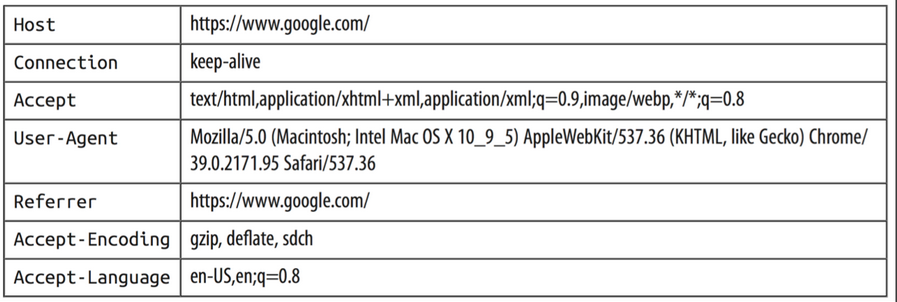

С ним на сервер попадает куча информации! Запрос от питона выглядит так:

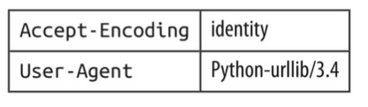

Заметили разницу?  Очевидно, что нашему скромному запросу не тягаться с таким обилием мета-информации, которое передается при запросе из обычного браузера. К счастью, никто нам не мешает притвориться человечными и пустить пыль в глаза сервера при помощи генерации фейкового юзер-агента. Библиотек, которые справляются с такой задачей, существует очень и очень много, лично мне больше всего нравится [fake-useragent.](https://pypi.org/project/fake-useragent/) При вызове метода из различных кусочков будет генерироваться рандомное сочетание операционной системы, спецификаций и версии браузера, которые можно передавать в запрос

In [ ]:
!pip install fake_useragent

In [ ]:
from fake_useragent import UserAgent
UserAgent().chrome

'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36 OPR/101.0.0.0'

Например, https://knowyourmeme.com/ не захочет пускать к себе python и выдаст ошибку 403. Она выдается сервером, если он доступен и способен обрабатывать запросы, но по некоторым личным причинам отказывается это делать.

In [ ]:
url = 'http://httpbin.org/headers'

response = requests.get(url)
response

<Response [200]>

А если сгенерировать User-Agent, вопросов у сервера не возникнет.

In [ ]:
response = requests.get(url, headers={'User-Agent': UserAgent().chrome})
response

<Response [200]>

__Другой пример:__ если захотите спарсить ЦИАН, он начнет вам выдавать капчу. Один из вариантов обхода: менять ip через тор. Однако на практически каждый запрос из-под тора, ЦИАН будет выдавать капчу. Если добавить в запрос `User_Agent`, то капча будет вылезать намного реже.

### в) общаться через посредников

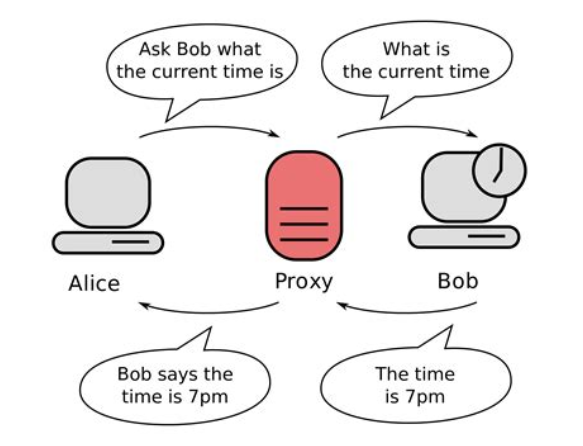

Посмотрим на свой ip-адрес без прокси.

In [ ]:
r = requests.get('https://httpbin.org/ip')
print(r.json())

{'origin': '34.86.180.150'}


А теперь попробуем посмотреть, что будет если подключить прокси.

In [ ]:
proxies = {
   'http': 'http://proxy.example.com:8080',
   'https': 'http://secureproxy.example.com:8090',
}

r = requests.get('https://httpbin.org/ip', proxies=proxies)

print(r.json())

Запрос работал немного подольше, ip адрес сменился. Большая часть проксей, которые вы найдёте работают криво. Иногда запрос идёт очень долго и выгоднее сбросить его и попробовать другую проксю. Это можно настроить опцией `timeout`.  Например, так если сервер не будет отвечать секунду, код упадёт.

In [ ]:
import requests
requests.get('http://www.google.com', timeout=1)

<Response [200]>

У requests есть довольно много разных интересных примочек. Посмотреть на них можно в [гайде из документации.](https://requests.readthedocs.io/en/master/user/advanced/)


__Где можно попытаться раздобыть списки прокси:__

* https://qna.habr.com/q/591069
* https://getfreeproxylists.blogspot.com/
* Большая часть бесплатных прокси обычно не работает. Пишите парсер, который будет собирать списки из проксей и пытаться применить их.

### г) уходить глубже

Можно попытаться обходить злые сервера через тор. Есть аж несколько способов, но мы про это говорить не будем. Лучше подробно почитать в нашей статье на Хабре. Ссылка на неё в конце тетрадки. Ещё в самом начале была. А ещё в середине [наверняка есть.](https://habr.com/ru/company/ods/blog/346632/)

### Совместить всё?

1. Начните с малого
2. Если продолжает банить, накидывайте новые примочки
3. Каждая новая примочка бьёт по скорости
4. [Разные примочки для requests](http://docs.python-requests.org/en/v0.10.6/user/advanced/)

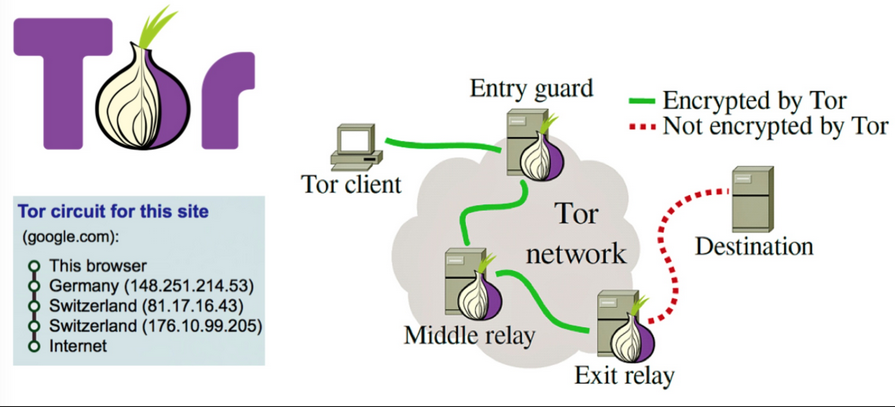

## Selenium

Это инструмент для роботизированного управления браузером. Для его коректной работы нужно скачать драйвер: [для хрома](https://sites.google.com/a/chromium.org/chromedriver/downloads) или [для фаерфокса.](https://github.com/mozilla/geckodriver/releases)

In [ ]:
from selenium import webdriver

driver = webdriver.Firefox()

После выполнения верхнего блока у вас откроется ещё один браузер. Можно пойти в нём на стартовую гугла.

In [ ]:
ref = 'http://google.com'
driver.get(ref)

Найти по html-коду строку для ввода запроса, кликнуть на неё.

In [ ]:
stroka = driver.find_element_by_name("q")
stroka.click()

Написать в неё что-нибудь.

In [ ]:
stroka.send_keys('Вконтакте')

Найти кнопку для гугления и нажать её.

In [ ]:
# находим кнопку для гугления и жмём её
button = driver.find_element_by_name('btnK')
button.click()

У нас на стринчке есть поисковая выдача. Заберём её в bs4 и найдём все сайты.

In [ ]:
bs = BeautifulSoup(driver.page_source)

dirty_hrefs = bs.find_all('h3',attrs={'class':'r'})
clean_hrefs = [href.a['href'] for href in dirty_hrefs]
clean_hrefs

['https://m.vk.com/login',
 'https://vk.com/about',
 'https://vk.com/page-777107_28406709',
 'https://vk.com/team',
 'https://vk.com/search',
 'https://vk.com/android_app']

Закроем браузер.

In [ ]:
driver.close()

Вообще selenium придумывали для тестировщиков, а не для парсинга. Для парсеров имеет смысл использовать только в крайнем случае. Он очень медленный. Если у вас очень-очень-очень-очень не получается обмануть сервер через `requests` или вы сталкиваетесь с какой-то специфической защитой от ботов, seleium может помочь. Ещё для selenium __важно__ не забывать ставить временные задержки, чтобы страница успевала прогрузиться. Либо можно дописывать полноценные код, который будет ждать прогрузки и только тогда тыкать на кнопки и тп.

И все же на практике selenium был полезен пару раз:

* Надо было скачать много информации о поисковых запросах из [Google Trends](https://trends.google.ru/trends/?geo=RU), а API имел серьезные ограничения

* Надо было понять через поисковик — какой у различных организаций ИНН по их наименованию (помогло только для крупных компаний)


Есть [перевод на русский документации на хабре](https://habr.com/ru/post/248559/).

## Хитрости



### Хитрость 1:  Не стесняйтесь пользоваться `try-except`

Эта конструкция позволяет питону в случае ошибки сделать что-нибудь другое либо проигнорировать её. Например, мы хотим найти логарифм от всех чисел из списка:

In [ ]:
from math import log

a = [1,2,3,-1,-5,10,3]

for item in a:
    print(log(item))

0.0
0.6931471805599453
1.0986122886681098


ValueError: math domain error

У нас не выходит, так как логарифм от отрицательных чисел не берётся. Чтобы код не падал при возникновении ошибки, мы можем его немного изменить:

In [ ]:
from math import log

a = [1,2,3,-1,-5,10,3]

for item in a:
    try:
        print(log(item))  # попробуй взять логарифм
    except ValueError:
        print('я не смог') # если не вышло, сознайся и работай дальше

0.0
0.6931471805599453
1.0986122886681098
я не смог
я не смог
2.302585092994046
1.0986122886681098


In [ ]:
a / 0

ZeroDivisionError: division by zero

In [ ]:
a = 10
b = 'a'

try:
    print(a / b)
except ZeroDivisionError:
    print('Деление на 0 запрещено')
except TypeError:
    print('Деление на другой тип данных запрещено')

Деление на другой тип данных запрещено


__Как это использовать при парсинге?__  Интернет создаёт человек. У многих людей руки очень кривые. Предположим, что мы на ночь поставили парсер скачивать цены, он отработал час и упал из-за того, что на како-нибудь одной странице были криво проставлены теги, либо вылезло какое-то редкое поле, либо вылезли какие-то артефакты от старой версии сайта, которые не были учтены в нашем парсере. Гораздо лучше, чтобы код проигнорировал эту ошибку и продолжил работать дальше.

### Хитрость 2:  pd.read_html

Если на странице, которую вы спарсили, среди тэгов `<tr>` и `<td>` прячется таблица, чаще всего можно забрать её себе без написания цикла, который будет перебирать все стобцы и строки. Поможет в этом `pd.read_html`. Например, вот так можно забрать себе [табличку с сайта ЦБ](https://cbr.ru/currency_base/daily/)

In [ ]:
import pandas as pd

df = pd.read_html('https://cbr.ru/currency_base/daily/')[0]
df.head()

,Цифр. код,Букв. код,Единиц,Валюта,Курс
0,36,AUD,1,Австралийский доллар,614691
1,944,AZN,1,Азербайджанский манат,572397
2,51,AMD,100,Армянских драмов,241932
3,933,BYN,1,Белорусский рубль,295283
4,975,BGN,1,Болгарский лев,528328


Команда пытается собрать в массив все таблички c веб-страницы. Если хочется, можно сначала через bs4 найти нужную таблицу, а потом уже распарсить её:

In [ ]:
resp = requests.get('https://cbr.ru/currency_base/daily/')
tree = BeautifulSoup(resp.content, 'html.parser')

# нашли табличку
table = tree.find_all('table', {'class' : 'data'})[0]

# распарсили её
df = pd.read_html(str(table))[0]
df.head()

,Цифр. код,Букв. код,Единиц,Валюта,Курс
0,36,AUD,1,Австралийский доллар,614691
1,944,AZN,1,Азербайджанский манат,572397
2,51,AMD,100,Армянских драмов,241932
3,933,BYN,1,Белорусский рубль,295283
4,975,BGN,1,Болгарский лев,528328


### Хитрость 3:  используйте пакет tqdm

> Код уже работает час. Я вообще без понятия когда он закончит работу. Было бы круто узнать, сколько ещё ждать...

Если в вашей голове возникла такая мысль, пакет `tqdm` ваш лучший друг. Установите его: ```pip install tqdm```

In [ ]:
from tqdm.notebook import tqdm

a = list(range(30))

# 30 раз будем спать по секунде
for i in tqdm(a):
    time.sleep(1)

  0%|          | 0/30 [00:00<?, ?it/s]

Мы обмотали тот вектор, по которому идёт цикл в `tqdm_notebook`. Это даёт нам красивую зелёную строку, которая показывает насколько сильно мы продвинулись по коду. Обматывайте свои самые большие и долгие циклы в `tqdm_notebook` и всегда понимайте сколько осталось до конца.

### Хитрость 4:  распаралеливание

Если сервер не очень настроен вас банить, можно распаралелить свои запросы к нему. Самый простой способ сделать это — библиотека `joblib`.

In [ ]:
from joblib import Parallel, delayed
from tqdm import tqdm_notebook

def simple_function(x):
    return x**2


nj = -1 # паралель на все ядра
result = Parallel(n_jobs=nj)(
                delayed(simple_function)(item)          # какую функцию применяем
                for item in tqdm_notebook(range(10)))   # к каким объектам применям

# tqdm_notebook в последней строчке будет создавать зелёный бегунок с прогрессом

<ipython-input-91-4ee1acc51653>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for item in tqdm_notebook(range(10)))   # к каким объектам применям


  0%|          | 0/10 [00:00<?, ?it/s]

На самом деле это не самый эффективный способ паралелить в python. Он ест много памяти и работает медленнее, чем [стандартный multiprocessing.](https://docs.python.org/3/library/multiprocessing.html) Но зато две строчки, КАРЛ! Две строчки!

###  Ещё хитрости

* __Сохраняйте то, что парсите по мере скачки!__ Прямо внутрь цикла запихните код, который сохраняет файл!
* Когда код упал в середине списка для скачки, не обязательно запускать его с самого начала. Просто сохраните тот кусок, который уже скачался и дозапустите код с места падения.
* Засовывать цикл для обхода ссылок внутрь функции - не самая хорошая идея. Предположим, что надо обойти $100$ ссылок. Функция должна вернуть на выход объекты, которые скачались по всему этому добру. Она берёт и падает на $50$ объекте. Конечно же то, что уже было скачано, функция не возвращает. Всё, что вы накачали - вы теряете. Надо запускать заново. Почему? Потому что внутри функции своё пространство имён. Если бы вы делали это циклом влоб, то можно было бы сохранить первые $50$ объектов, которые уже лежат внутри листа, а потом продолжить скачку.
* Можно ориентироваться на html-страничке с помощью `xpath`. Он предназначен для того, чтобы внутри html-странички можно было быстро находить какие-то элементы. [Подробнее можно почитать тут.](https://devhints.io/xpath)
* Не ленитесь листать документацию. Из неё можно узнать много полезных штук.